In [99]:
import osmnx as ox
import folium
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from geopy.distance import geodesic
plt.style.use('ggplot')


In [2]:
def get_coordinates(g: nx.Graph):
    """Coordinates in latitute and longitude"""
    x_pos = dict(g.nodes(data="x"))
    y_pos = dict(g.nodes(data="y"))
    pos = {key: (x_pos[key], y_pos[key]) for key in x_pos.keys()}
    return pos

In [93]:
# Extract and process the graph
munich_graph = ox.load_graphml("../data/munich_street_network_accident.graphml")

# get coordinates
coors = get_coordinates(munich_graph)

### Develop similarity

In [167]:
# Degree centrality for nodes
in_degree = munich_graph.in_degree()
in_degree

InMultiDegreeView({236827: 2, 236835: 2, 236836: 2, 236842: 1, 236847: 2, 236849: 2, 236851: 3, 236852: 4, 245333: 4, 245334: 3, 245339: 2, 245340: 2, 245344: 3, 245353: 2, 245356: 2, 245360: 3, 245363: 2, 245372: 2, 245408: 2, 245412: 3, 245414: 2, 245415: 2, 246408: 4, 277381: 3, 277382: 4, 277383: 4, 277384: 4, 277385: 3, 277386: 3, 277387: 4, 277388: 4, 287664: 3, 287667: 1, 295122: 2, 295156: 2, 295157: 2, 295170: 2, 295184: 2, 295189: 3, 295209: 3, 295216: 2, 295407: 1, 295521: 3, 295544: 2, 295576: 2, 295586: 2, 295587: 1, 295588: 2, 295599: 1, 361774: 1, 361775: 2, 361776: 2, 361779: 2, 361780: 3, 361786: 2, 361790: 3, 361791: 2, 361792: 1, 361793: 1, 361794: 3, 361797: 2, 361798: 2, 361799: 2, 361802: 2, 361803: 2, 361814: 2, 361830: 3, 361843: 2, 363166: 4, 363169: 4, 363187: 2, 363189: 3, 363191: 4, 363192: 3, 363193: 3, 363194: 2, 363197: 3, 363199: 3, 363200: 2, 363204: 3, 363205: 3, 363206: 3, 363211: 2, 363212: 3, 363213: 3, 363214: 2, 363215: 2, 363216: 2, 363219: 2, 39

In [36]:
# Distance
for a, b, c in munich_graph.edges:
    x1 = munich_graph.nodes[a]["x"]
    y1 = munich_graph.nodes[a]["y"]
    x2 = munich_graph.nodes[b]["x"]
    y2 = munich_graph.nodes[b]["y"]

    coord1 = (x1, y1)
    coord2 = (x2, y2)
    dist = geodesic(coord1, coord2).meters

    munich_graph.edges[(a,b,c)]["length"] = dist

In [37]:
munich_graph.edges(data=True)

OutMultiEdgeDataView([(236835, 29007695, {'osmid': 134693376, 'oneway': True, 'lanes': '3', 'ref': 'B 2', 'name': 'Landsberger Straße', 'highway': 'primary', 'maxspeed': '50', 'reversed': False, 'length': 182.49545278807864, 'geometry': <LINESTRING (11.504 48.143, 11.506 48.143, 11.506 48.143)>, 'num_accidents': '0'}), (236836, 682001879, {'osmid': 342863165, 'lanes': '4', 'ref': 'B 2', 'name': 'Landsberger Straße', 'highway': 'primary', 'maxspeed': '60', 'oneway': False, 'reversed': True, 'length': 23.055419967775045, 'num_accidents': '0'}), (236836, 1872411594, {'osmid': 152062776, 'oneway': True, 'lanes': '3', 'ref': 'B 2', 'name': 'Landsberger Straße', 'highway': 'primary', 'maxspeed': '60', 'reversed': False, 'length': 116.93328609348379, 'geometry': <LINESTRING (11.507 48.143, 11.507 48.143, 11.506 48.143)>, 'num_accidents': '0'}), (236842, 247032060, {'osmid': [145795414, 291800985, 145795410, 338471750], 'bridge': 'yes', 'oneway': True, 'lanes': '2', 'ref': 'B 2R', 'highway': '

In [38]:
munich_graph.nodes(data=True)

NodeDataView({236827: {'y': 48.1282686, 'x': 11.5248237, 'street_count': 3, 'num_accidents': '0'}, 236835: {'y': 48.1428608, 'x': 11.5044017, 'street_count': 3, 'num_accidents': '0'}, 236836: {'y': 48.1426711, 'x': 11.5074585, 'street_count': 3, 'num_accidents': '0'}, 236842: {'y': 48.1420601, 'x': 11.5344311, 'highway': 'motorway_junction', 'street_count': 3, 'num_accidents': '0'}, 236847: {'y': 48.1505134, 'x': 11.5371011, 'street_count': 3, 'num_accidents': '0'}, 236849: {'y': 48.1538332, 'x': 11.5372106, 'street_count': 4, 'num_accidents': '0'}, 236851: {'y': 48.1540081, 'x': 11.5397703, 'street_count': 3, 'num_accidents': '0'}, 236852: {'y': 48.1536326, 'x': 11.5390944, 'street_count': 4, 'num_accidents': '0'}, 245333: {'y': 48.1523624, 'x': 11.5399711, 'street_count': 4, 'num_accidents': '0'}, 245334: {'y': 48.1478009, 'x': 11.5277909, 'highway': 'traffic_signals', 'street_count': 4, 'num_accidents': '0'}, 245339: {'y': 48.1463786, 'x': 11.5357006, 'street_count': 4, 'num_acciden

### Sensitivity analysis based on features

In [159]:
def feature_effect(g, feature):
    for a, b, c in g.edges():
        pass

def fix_maxspeed(g):
    for a, b in g.edges():
        try:
            max_speed = int(g.edges[a, b, 0]["maxspeed"])
        except TypeError:
            max_speed = max(int(x) for x in g.edges[a, b, 0]["maxspeed"])
        except KeyError:
            max_speed = 100

        g.edges[a, b, 0]["maxspeed"] = max_speed

def effect_max_speed(g):
    d = {}
    d_road = {}
    for a, b in g.edges():
        num_accidents = int(g.edges[a, b, 0]["num_accidents"])
        max_speed = g.edges[a, b, 0]["maxspeed"]
        try:
            d[max_speed] += num_accidents
            d_road[max_speed] += 1
        except KeyError:
            d[max_speed] = num_accidents
            d_road[max_speed] = 1
    nd = {key : d[key] / d_road[key] for key, val in d.items()}
    analysis = pd.Series(nd).sort_index()

    return analysis

In [95]:
# Check speeds
fix_maxspeed(munich_graph)

In [160]:
speed_analysis = effect_max_speed(munich_graph)
speed_analysis = pd.Series(speed_analysis).sort_index()
speed_analysis

5      0.000000
10     0.000000
20     0.000000
30     0.061337
40     0.636364
50     0.285838
60     0.496599
100    0.072398
dtype: float64

Text(0, 0.5, 'Nr. accidents')

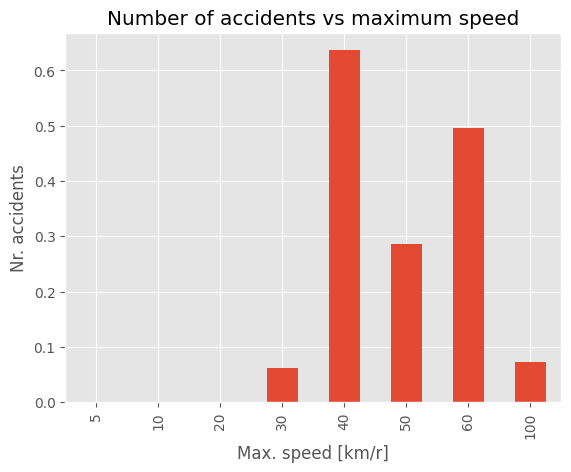

In [161]:
speed_analysis.plot.bar()
plt.title("Number of accidents vs maximum speed")
plt.xlabel("Max. speed [km/r]")
plt.ylabel("Nr. accidents")

In [134]:
def effect_distance(g, num_bins=10):
    max_dist = max([g.edges[a, b, 0]["length"] for a, b in g.edges()])
    bin_width = max_dist / num_bins
    bin_data = [0] * num_bins
    for a, b in g.edges():
        num_accidents = int(g.edges[a, b, 0]["num_accidents"])
        dist = g.edges[a, b, 0]["length"]
        bin_ind = int(max_dist / dist)
        bin_ind = bin_ind if bin_ind < num_bins else num_bins - 1
        bin_data[bin_ind] += num_accidents
    return bin_data

In [132]:
distance_analysis = effect_distance(munich_graph)
distance_analysis = pd.Series(distance_analysis).sort_index()
distance_analysis

0      0
1     46
2     48
3     64
4    115
5    129
6     81
7     84
8     61
9    416
dtype: int64

<Axes: >

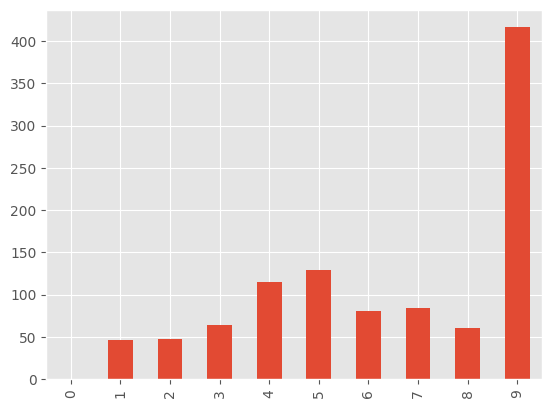

In [133]:
distance_analysis.plot.bar()

In [146]:
dist_list = [munich_graph.edges[a,b,0]["length"] for a, b in munich_graph.edges()]
acc_list = [int(munich_graph.edges[a,b,0]["num_accidents"]) for a, b in munich_graph.edges()]
hist_dist_list = [[x] * y for x, y in zip(dist_list, acc_list)]
hist_dist_arr = np.concatenate(hist_dist_list)

Text(0, 0.5, 'Nr. accidents')

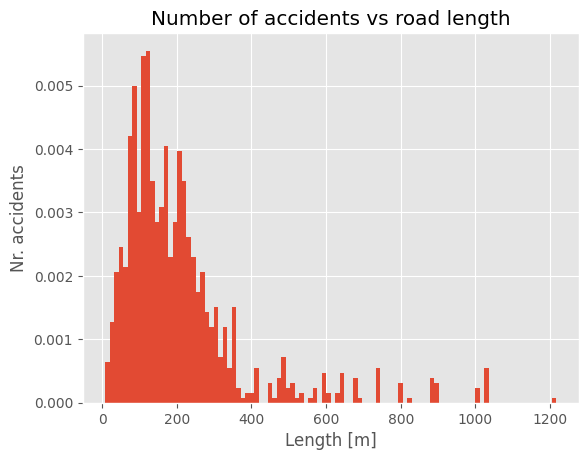

In [166]:
plt.hist(hist_dist_arr, bins=100, density=True, stacked=True)
plt.title("Number of accidents vs road length")
plt.xlabel("Length [m]")
plt.ylabel("Nr. accidents")

In [157]:
def effect_highway_category(g):
    import copy
    d = {}
    d_road = {}
    for a, b in g.edges():
        num_accidents = int(g.edges[a, b, 0]["num_accidents"])
        hw_category = g.edges[a, b, 0]["highway"]
        if type(hw_category) == list:
            c_hw_category = copy.deepcopy(hw_category)
            for hw_category in c_hw_category:
                if hw_category != "unclassified":
                    break
        try:
            d[hw_category] += num_accidents
            d_road[hw_category] += 1
        except KeyError:
            d[hw_category] = num_accidents
            d_road[hw_category] = 1
    nd = {key : d[key] / d_road[key] for key, val in d.items()}
    analysis = pd.Series(nd).sort_index()
    return analysis

<Axes: >

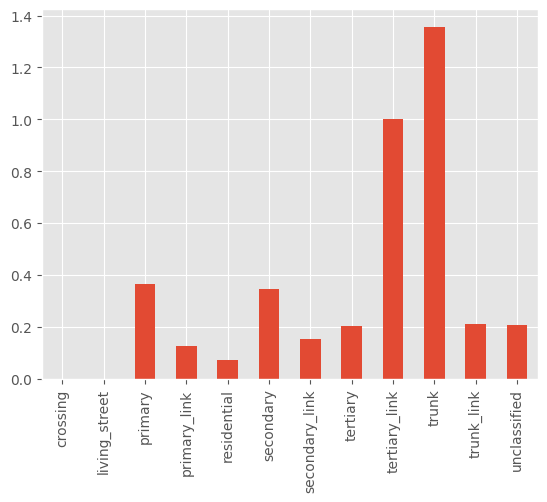

In [158]:
highway_analysis = effect_highway_category(munich_graph)
highway_analysis.plot.bar()

In [173]:
def effect_degree(g):
    d = {}
    d_node = {}
    in_degree = munich_graph.in_degree()
    for n in g.nodes():
        num_accidents = int(g.nodes[n]["num_accidents"])
        deg = in_degree[n]
        if not deg and num_accidents:
            print(f"Node w/zero deg centrality: {n} w/num accidents {num_accidents}")
        try:
            d[deg] += num_accidents
            d_node[deg] += 1
        except KeyError:
            d[deg] = num_accidents
            d_node[deg] = 1
    nd = {key : d[key] / d_node[key] for key, val in d.items()}
    analysis = pd.Series(nd).sort_index()
    return analysis

Node w/zero deg centrality: 19090055 w/num accidents 1
Node w/zero deg centrality: 21092097 w/num accidents 1


<Axes: >

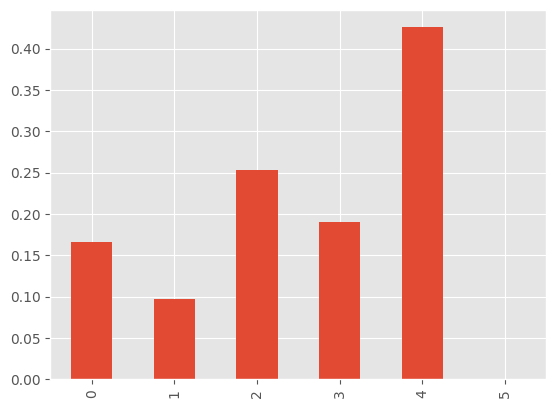

In [174]:
degree_analysis = effect_degree(munich_graph)
degree_analysis.plot.bar()